##Intro

<p>Para análise de clientes é costume utilizar uma "metodologia" que avalia</p>

*   Recência
*   Frequência
*   Gasto Monetario

<p>Assim podemos avaliar o perfil do cliente de acordo com seu hábito de consumo e engajamento e posteriormente encontrar padrões de perfis para realizar uma segmentação e achar publicos-alvos.</p>

<p>Essa segmentação é fundamental para as tarefas de criação de produtos e soluções além propiciar entendimento para criação de valor e formas de fidelização desses clientes.</p>

Foco do estudo:

*   Identificar os clientes mais valiosos a nível de recorrência, frequência, novos clientes, tempo de ultima compra;
*   Intervalo de compras;
*   Ticket Médio entre os clientes;
*  Clientes cujo potencial de compras pode ser estimulado;
*  Identificar padrões nos perfis de cliente e realizar a segmentação.







###Sobre o Dataframe

O dataframe foi obtido no [Kaggle](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign) e as colunas dizem respeito a:

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household

Teenhome - number of teenagers in customer’s household

Income - customer’s yearly household income

MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase




#EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 400)

###Tratamento de Dados

In [4]:
colunas = ['ID','Ano_Nascimento','Escolaridade','Estado_Civil','Renda_Anual','Qtd_Criancas','Qtd_Adolescentes','Dt_Cadastro','Recencia','Gasto_Vinhos','Gasto_Frutas'
                ,'Gasto_Carne','Gasto_Peixe','Gasto_Doces','Gasto_Ouro','Compras_C_Desconto','Compras_Internet','Compras_Catalogo','Compras_Loja','Qtd_Visitas_Web'
                ,'Aceita_Campanha3','Aceita_Campanha4','Aceita_Campanha5','Aceita_Campanha1','Aceita_Campanha2','Reclamacoes_Ult2Anos','Custo_Contato','Receita','Resposta']

In [5]:
dfClientes = pd.read_csv('https://raw.githubusercontent.com/GuiMendeees/Dados/main/Clustering/marketing_campaign.csv', sep=';')

In [6]:
dfClientes.columns = colunas

In [7]:
dfClientes.sample(10)

,ID,Ano_Nascimento,Escolaridade,Estado_Civil,Renda_Anual,Qtd_Criancas,Qtd_Adolescentes,Dt_Cadastro,Recencia,Gasto_Vinhos,Gasto_Frutas,Gasto_Carne,Gasto_Peixe,Gasto_Doces,Gasto_Ouro,Compras_C_Desconto,Compras_Internet,Compras_Catalogo,Compras_Loja,Qtd_Visitas_Web,Aceita_Campanha3,Aceita_Campanha4,Aceita_Campanha5,Aceita_Campanha1,Aceita_Campanha2,Reclamacoes_Ult2Anos,Custo_Contato,Receita,Resposta
1331,5621,1969,Graduation,Married,48752.0,1,1,2012-12-12,8,73,57,100,71,15,0,5,6,1,5,9,0,0,0,0,0,0,3,11,1
249,8932,1969,Master,Together,65176.0,0,1,2012-10-29,57,960,28,183,220,70,70,4,9,6,6,6,0,0,0,0,0,0,3,11,0
1101,10552,1979,2n Cycle,Married,54210.0,0,1,2013-05-20,18,70,54,109,80,9,45,2,4,1,7,5,0,0,0,0,0,0,3,11,0
574,7369,1981,Master,Married,36959.0,1,0,2013-10-02,56,25,6,25,6,0,0,2,2,0,3,8,0,0,0,0,0,0,3,11,0
2163,7313,1949,2n Cycle,Widow,74859.0,0,0,2013-06-03,63,570,73,614,133,102,73,1,6,5,11,3,0,0,0,1,0,0,3,11,0
2041,4974,1970,Graduation,Single,83273.0,1,2,2012-09-25,98,433,89,650,16,102,102,10,4,6,9,7,0,0,0,0,0,0,3,11,0
1444,1553,1946,Graduation,Together,82657.0,0,0,2013-09-27,71,966,168,672,246,105,126,1,7,5,10,4,0,1,0,1,0,0,3,11,0
2199,9014,1975,Graduation,Married,37085.0,1,1,2014-06-26,65,39,1,16,2,0,3,4,3,0,3,8,0,0,0,0,0,0,3,11,0
664,8162,1956,Master,Together,14661.0,0,0,2013-01-01,88,4,1,11,6,2,2,1,1,0,3,6,0,0,0,0,0,0,3,11,0
2200,7620,1990,Basic,Single,16185.0,1,0,2013-08-05,71,5,11,16,21,8,45,2,2,2,2,8,0,0,0,0,0,0,3,11,0


In [8]:
dfClientes.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Ano_Nascimento,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Renda_Anual,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Qtd_Criancas,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Qtd_Adolescentes,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recencia,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
Gasto_Vinhos,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
Gasto_Frutas,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
Gasto_Carne,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
Gasto_Peixe,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [9]:
dfClientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2240 non-null   int64  
 1   Ano_Nascimento        2240 non-null   int64  
 2   Escolaridade          2240 non-null   object 
 3   Estado_Civil          2240 non-null   object 
 4   Renda_Anual           2216 non-null   float64
 5   Qtd_Criancas          2240 non-null   int64  
 6   Qtd_Adolescentes      2240 non-null   int64  
 7   Dt_Cadastro           2240 non-null   object 
 8   Recencia              2240 non-null   int64  
 9   Gasto_Vinhos          2240 non-null   int64  
 10  Gasto_Frutas          2240 non-null   int64  
 11  Gasto_Carne           2240 non-null   int64  
 12  Gasto_Peixe           2240 non-null   int64  
 13  Gasto_Doces           2240 non-null   int64  
 14  Gasto_Ouro            2240 non-null   int64  
 15  Compras_C_Desconto   

Observamos que a Renda Anual apresenta alguns valores faltantes 24 para ser mais exato a decisão sobre o que fazer envolve a substituição ou remoção dos dados, por se tratar de poucos registros a remoção inicialmente foi considerada, no entanto pode ser referente a algum subgrupo de segmentação específico e dessa forma a alternativa é a substituição.

Primariamente observando a distribuição dos dados vemos a presença de outliers que a principio não impactarão tanto na substituição dos missing values pela média em função de sua quantidade, mas os valores extremos são bem altos, portanto serão tratados antes da substituição.

<Axes: xlabel='Renda_Anual', ylabel='Count'>

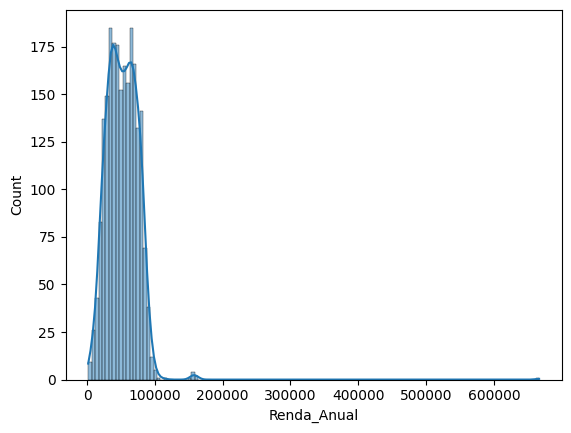

In [10]:
sns.histplot(dfClientes['Renda_Anual'],kde=True)

In [11]:
q1 = dfClientes['Renda_Anual'].quantile(0.25)
q3 = dfClientes['Renda_Anual'].quantile(0.75)
IQR = q3-q1

dfClientes = dfClientes.loc[(dfClientes['Renda_Anual'] > q1 - 1.5 *IQR )
                              &
                            (dfClientes['Renda_Anual'] < q3 + 1.5 *IQR )]

In [12]:
dfClientes['Renda_Anual'].fillna(dfClientes['Renda_Anual'].mean(), inplace=True)

Observando as colunas as ultimas 3 não apresentam descrição na documentação e embora seja possivel realizar inferências a respeito de sua natureza por apresentarem um valor unico para cada atributo para este estudo elas foram suprimidas

In [13]:
dfClientes['Estado_Civil'].value_counts()

Married     854
Together    569
Single      471
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Estado_Civil, dtype: int64

In [14]:
dfClientes = dfClientes[~dfClientes['Estado_Civil'].isin(['YOLO','Absurd','Alone'])]

In [15]:
dfClientes['Estado_Civil'].value_counts()

Married     854
Together    569
Single      471
Divorced    231
Widow        76
Name: Estado_Civil, dtype: int64

Ao observamos a amostra percebemos a presença de um Estado Civil fora do padrão chamado YOLO, investigando encontramos três que não são formalmente uma definição: YOLO, Absurd e Alone.

Por se tratar de poucos registros os mesmos foram removidos

In [16]:
dfClientes.drop(columns = ['Custo_Contato','Receita','Resposta'], inplace = True)

A partir do ano de nascimento do cliente criado a coluna de idade e uma coluna de faixa de idade pensando numa segmentação que diferencie pessoas mas que não crie tantas "classes"

Crianças: 0-12 anos

Adolescentes: 13-19 anos

Adultos jovens: 20-34 anos

Adultos de meia-idade: 35-54 anos

Idosos: 55 anos ou mais

Foi pensada a estratégia de binning, porem a estratégia só seria efetiva se os grupos de interesse estivessem bem balanceados na base

In [17]:
dfClientes['Idade'] = 2023 - dfClientes['Ano_Nascimento']

In [18]:
dfClientes['Idade'].sort_values(ascending=False).value_counts()

47     88
52     85
48     82
51     78
45     76
53     75
58     74
54     70
49     69
50     68
67     55
44     53
71     52
65     51
55     51
57     50
46     50
64     50
69     49
63     49
68     48
61     44
60     44
56     44
41     43
72     42
40     41
37     41
59     41
66     40
43     39
39     38
42     38
62     35
70     35
38     32
73     29
74     29
34     29
35     28
36     27
75     21
33     18
77     16
76     16
32     15
31     13
78      8
79      7
80      6
28      5
30      4
29      3
27      2
124     1
82      1
83      1
123     1
130     1
Name: Idade, dtype: int64

Observando a idade vemos aluguns valores extremos de idade, acima de 100 anos o que indica provavel erro de cadastro tendo em vista o senso comun, por serem poucos registros e não existir a possibilidade de conferência sistemica esses valores acima de 100 anos de idade serão excluidos

In [19]:
dfClientes = dfClientes.loc[dfClientes['Idade']<=100]

In [20]:
def set_faixa_etaria(idade):
  if idade <= 12:
    return 'Crianca'
  elif  13 <= idade <=19:
    return 'Adolescente'
  elif 20 <= idade <= 34:
    return 'Adulto Jovem'
  elif  35 <= idade <=54:
    return 'Adulto Meia-Idade'
  else:
    return 'Idoso'

In [21]:
dfClientes['Faixa_Etaria'] = dfClientes['Idade'].apply(set_faixa_etaria)

Agregando as quantidades e totais de compras por cada cliente que estão segmentadas na base

In [22]:
dfClientes['Total_Gasto'] = dfClientes['Gasto_Vinhos'] + dfClientes['Gasto_Carne'] + dfClientes['Gasto_Doces'] + dfClientes['Gasto_Peixe'] + dfClientes['Gasto_Ouro']
dfClientes['Total_Compras'] = dfClientes['Compras_C_Desconto'] + dfClientes['Compras_Catalogo'] + dfClientes['Compras_Internet'] + dfClientes['Compras_Loja']

Incluindo Coluna que diz quanto tempo o cliente está ativo na base

In [23]:
dfClientes['Dt_Cadastro'] = pd.to_datetime(dfClientes['Dt_Cadastro'])
dfClientes['Tempo_Relacionamento'] = dt.datetime.now().year - dfClientes['Dt_Cadastro'].dt.year

##Hipóteses

### Renda e Gasto

Text(0, 0.5, 'Renda Anual')

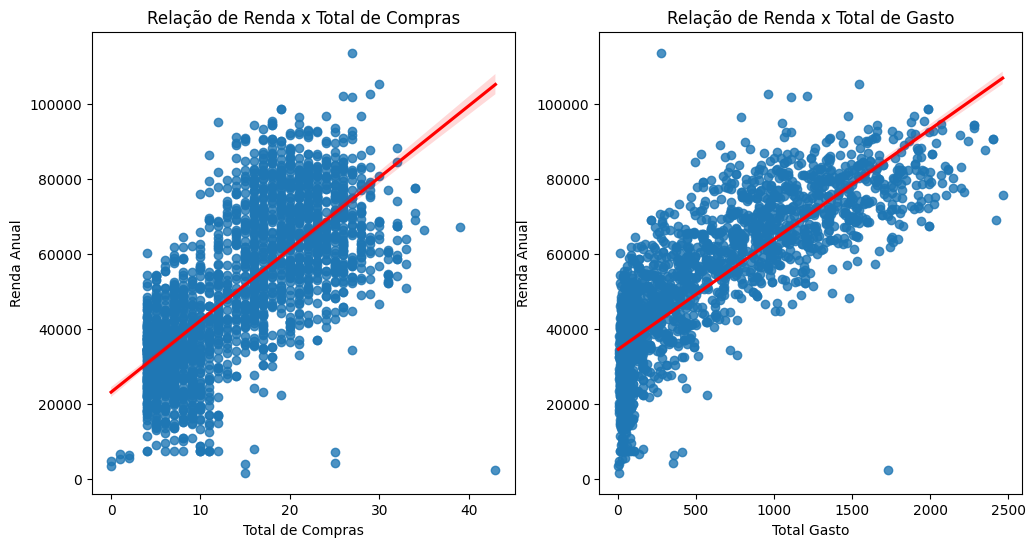

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12,6))


sns.regplot(x=dfClientes['Total_Compras'], y=dfClientes['Renda_Anual'], line_kws= {'color':'red'},ax=axes[0])
axes[0].set_title('Relação de Renda x Total de Compras')
axes[0].set_xlabel('Total de Compras')
axes[0].set_ylabel('Renda Anual')

sns.regplot(x=dfClientes['Total_Gasto'], y=dfClientes['Renda_Anual'], line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title('Relação de Renda x Total de Gasto')
axes[1].set_xlabel('Total Gasto')
axes[1].set_ylabel('Renda Anual')

Como naturalmente esperado o volume de gastos e compras é fortemente  positivo quando relacionado com o valor da renda anual

Renda x Escolaridade

Text(0, 0.5, 'Grau de Escolaridade')

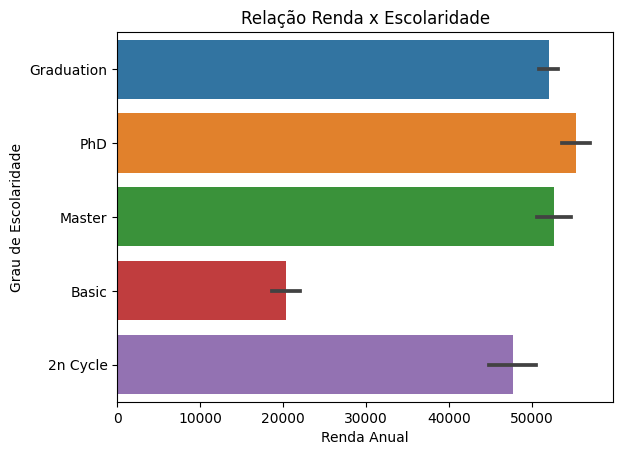

In [25]:
sns.barplot(x=dfClientes['Renda_Anual'], y=dfClientes['Escolaridade'])
plt.title('Relação Renda x Escolaridade')
plt.xlabel('Renda Anual')
plt.ylabel('Grau de Escolaridade')

Como esperado pelo senso comun o grau de escolaridade mais alto está refletindo em rendas anuais mais altas por parte dos clientes

Text(0, 0.5, 'Quantidade')

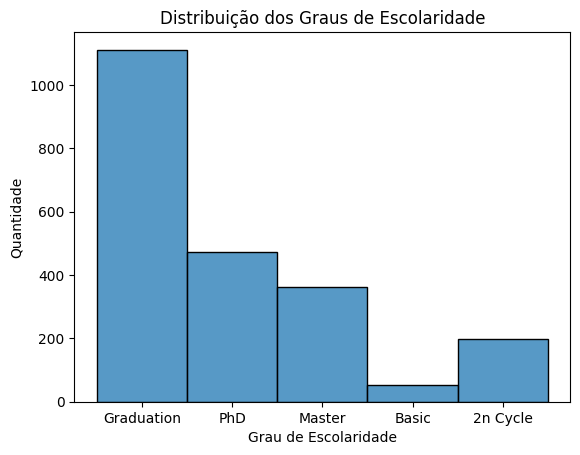

In [26]:
sns.histplot(dfClientes['Escolaridade'])
plt.title('Distribuição dos Graus de Escolaridade')
plt.xlabel('Grau de Escolaridade')
plt.ylabel('Quantidade')

In [27]:
dfClientes['Escolaridade'].value_counts(normalize=True)

Graduation    0.505460
PhD           0.215196
Master        0.164695
2n Cycle      0.090082
Basic         0.024568
Name: Escolaridade, dtype: float64

A base é composta por 38% de Mestre e Doutores, 50% de Graduados e 12% de Pessoas que tem o nível Fundamental e Médio

Por mais que os clientes possuam uma base de ensino maior uma quantidade significativa as pessoas que tem os níveis mais básicos de estudo, dessa forma a comunicação e as políticas da empresa devem ser muito bem pensadas a fim de não segregar esse público pois eles tambem consomem.

Renda x Estado Civil

Text(0, 0.5, 'Estado Civíl')

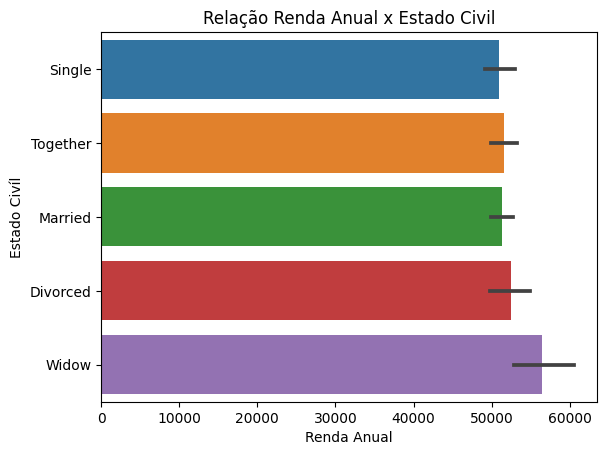

In [28]:
sns.barplot(x=dfClientes['Renda_Anual'], y=dfClientes['Estado_Civil'])
plt.title('Relação Renda Anual x Estado Civil')
plt.xlabel('Renda Anual')
plt.ylabel('Estado Civíl')

A composição da base mostra que as pessoas Viúvas e Divorciadas apresentam uma renda anual maior que os demais estados civis, no entanto são a menor fatia da base de clientes

Text(0, 0.5, 'Quantidade')

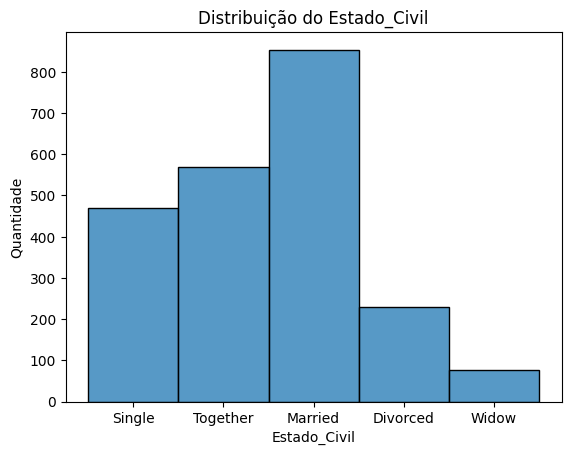

In [29]:
sns.histplot(dfClientes['Estado_Civil'])
plt.title('Distribuição do Estado_Civil')
plt.xlabel('Estado_Civil')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Ticket Médio')

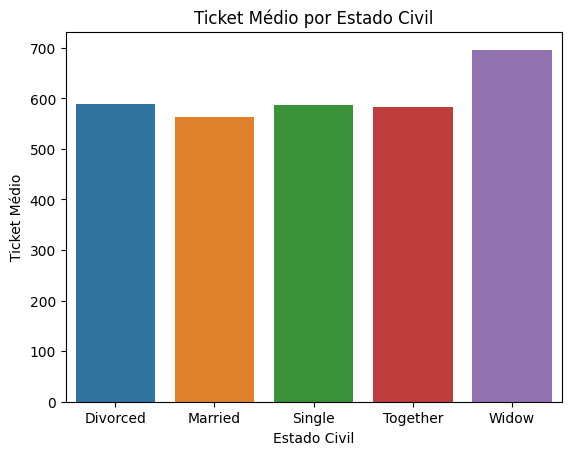

In [30]:
dfTktMedEstado_Civil = (
                dfClientes[['Total_Gasto','Estado_Civil']]
                .groupby('Estado_Civil')
                .mean()
                .reset_index()
                .rename(columns={'Total_Gasto' : 'TktMedio'})
)

sns.barplot(x=dfTktMedEstado_Civil['Estado_Civil'], y = dfTktMedEstado_Civil['TktMedio'])
plt.title('Ticket Médio por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Ticket Médio')

Vemos que o estado civil de Casados que é o mais representativo na base não tem um ticket médio muito elevado em relação aos demais grupos o que pode ser uma oportunidade para elevar as receitas, por outro lado o grupo de Viúvos é o que tem o maior ticket médio e o que corresponde a menor representação na base o que tambem pode ser uma oportunidade de incremento de receita ao captar mais clientes desse perfil.

Text(0, 0.5, 'Percentual de Gasto Medio')

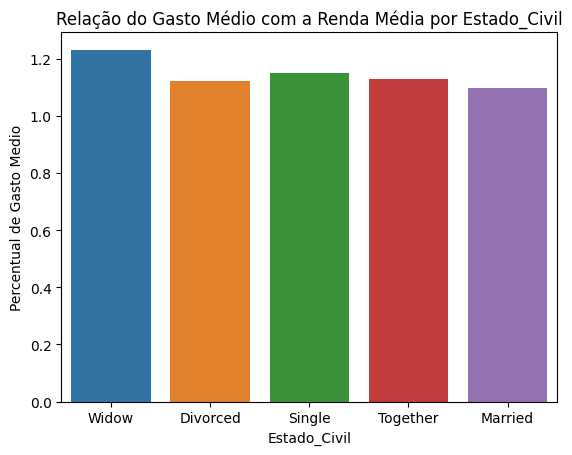

In [31]:
dfRendMedEstCiv = (
                dfClientes[['Renda_Anual','Total_Gasto','Estado_Civil']]
                .groupby('Estado_Civil')
                .mean()
                .reset_index()
                .rename(columns={'Renda_Anual' : 'Renda_Media_Anual' , 'Total_Gasto':'TktMedio'})
                .sort_values(by=['TktMedio'],ascending=False)
)

dfRendMedEstCiv['Perc_Medio_Gasto'] = (dfRendMedEstCiv['TktMedio']/dfRendMedEstCiv['Renda_Media_Anual'])*100
sns.barplot(x=dfRendMedEstCiv['Estado_Civil'] , y =dfRendMedEstCiv['Perc_Medio_Gasto'])
plt.title('Relação do Gasto Médio com a Renda Média por Estado_Civil')
plt.xlabel('Estado_Civil')
plt.ylabel('Percentual de Gasto Medio')

Do ponto de vista do gasto medio em relação a renda média observa-se que os valores são baixos no entanto não há como supor se há oportunidade sem conhecer a natureza dos produtos, da empresa e do mercado em que ela atua.

Renda x Faixa Etaria

Text(0, 0.5, 'Faixa Etaria')

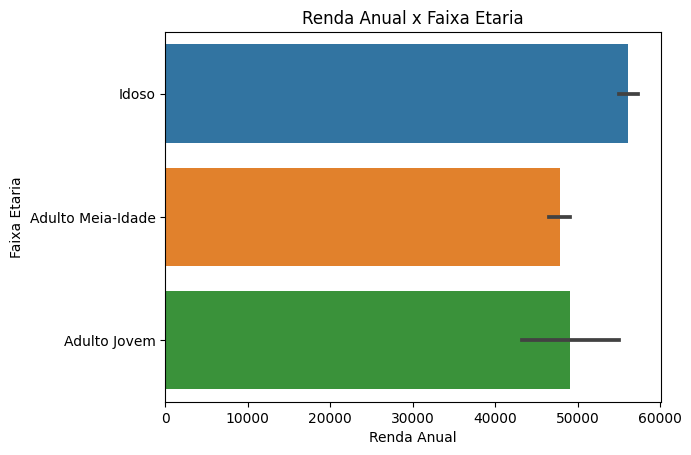

In [32]:
sns.barplot(x=dfClientes['Renda_Anual'], y=dfClientes['Faixa_Etaria'])
plt.title('Renda Anual x Faixa Etaria')
plt.xlabel('Renda Anual')
plt.ylabel('Faixa Etaria')

A renda anual dos Idosos é relativamente maior que os demais grupos

Text(0, 0.5, 'Quantidade')

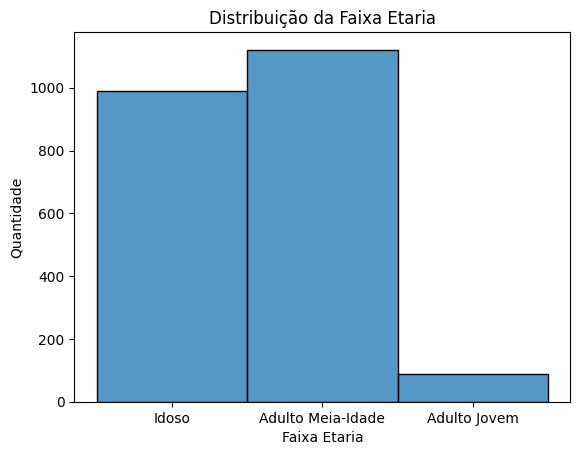

In [33]:
sns.histplot(x=dfClientes['Faixa_Etaria'])
plt.title('Distribuição da Faixa Etaria')
plt.xlabel('Faixa Etaria')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Ticket Médio')

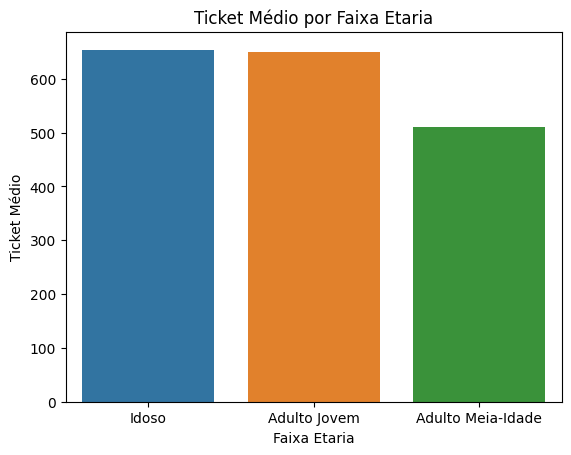

In [34]:
dfTktMedFaixaEtaria = (
    dfClientes[['Renda_Anual','Total_Gasto','Faixa_Etaria']]
          .groupby('Faixa_Etaria')
          .mean()
          .reset_index()
          .rename(columns={'Renda_Anual':'Renda_Media_Anual', 'Total_Gasto':'Tkt_Medio'})
          .sort_values(by='Tkt_Medio',ascending=False)

)

sns.barplot(x=dfTktMedFaixaEtaria['Faixa_Etaria'], y=dfTktMedFaixaEtaria['Tkt_Medio'])
plt.title('Ticket Médio por Faixa Etaria')
plt.xlabel('Faixa Etaria')
plt.ylabel('Ticket Médio')

O grupo mais representativo na base de clientes são os Adultos de Meia Idade no entanto são os que apresentam o menor ticket médio, indicado uma oportunidade o que pode ser uma oportunidade para elevar as receitas.

Gasto x Tempo de Relacionamento - Clientes Mais Antigos são mais fiés que os novos?

Text(0, 0.5, 'Tempo de Relacionamento')

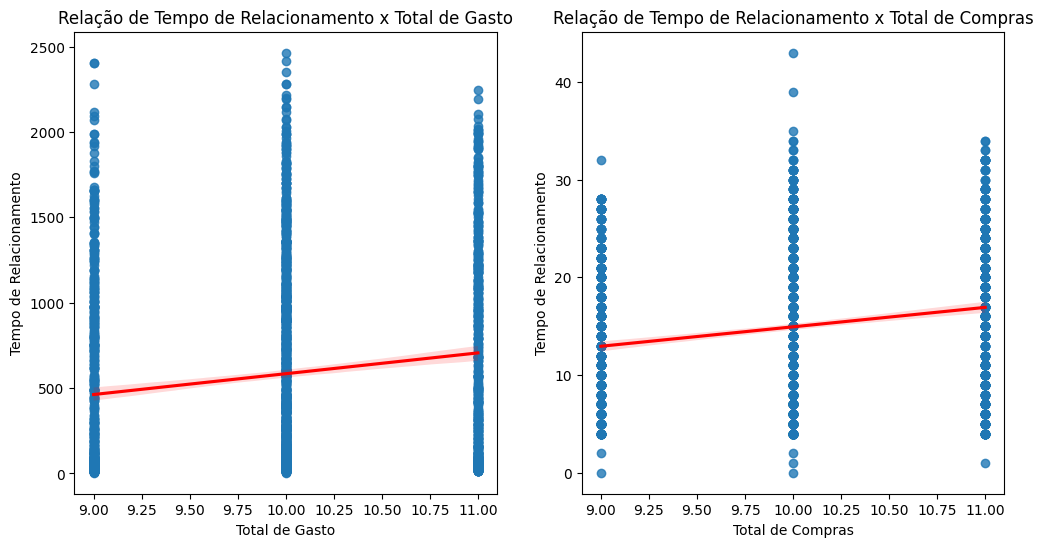

In [35]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.regplot(x=dfClientes['Tempo_Relacionamento'], y=dfClientes['Total_Gasto'], ax=axes[0],line_kws={'color':'red'})
axes[0].set_title('Relação de Tempo de Relacionamento x Total de Gasto')
axes[0].set_xlabel('Total de Gasto')
axes[0].set_ylabel('Tempo de Relacionamento')


sns.regplot(x=dfClientes['Tempo_Relacionamento'], y=dfClientes['Total_Compras'],ax=axes[1],line_kws={'color':'red'})
axes[1].set_title('Relação de Tempo de Relacionamento x Total de Compras')
axes[1].set_xlabel('Total de Compras')
axes[1].set_ylabel('Tempo de Relacionamento')

A base de clientes não possui clientes novos ou um intervalo de tempo de relacionamento grande para que possamos estabelecer uma análise mais "balanceada" mas há um indício de correlação positiva entre o tempo de relacionamento e os totais de compras e gastos, no entanto ele não é muito forte

Faixa Etaria x Canal de Compra - Colunas de Compras

In [36]:
dfCanalIdade = (
    dfClientes[['Idade','Compras_Internet','Compras_Catalogo','Compras_Loja']]
                .groupby('Idade')
                .mean()
                .reset_index()


)

Text(0, 0.5, 'Canal Loja')

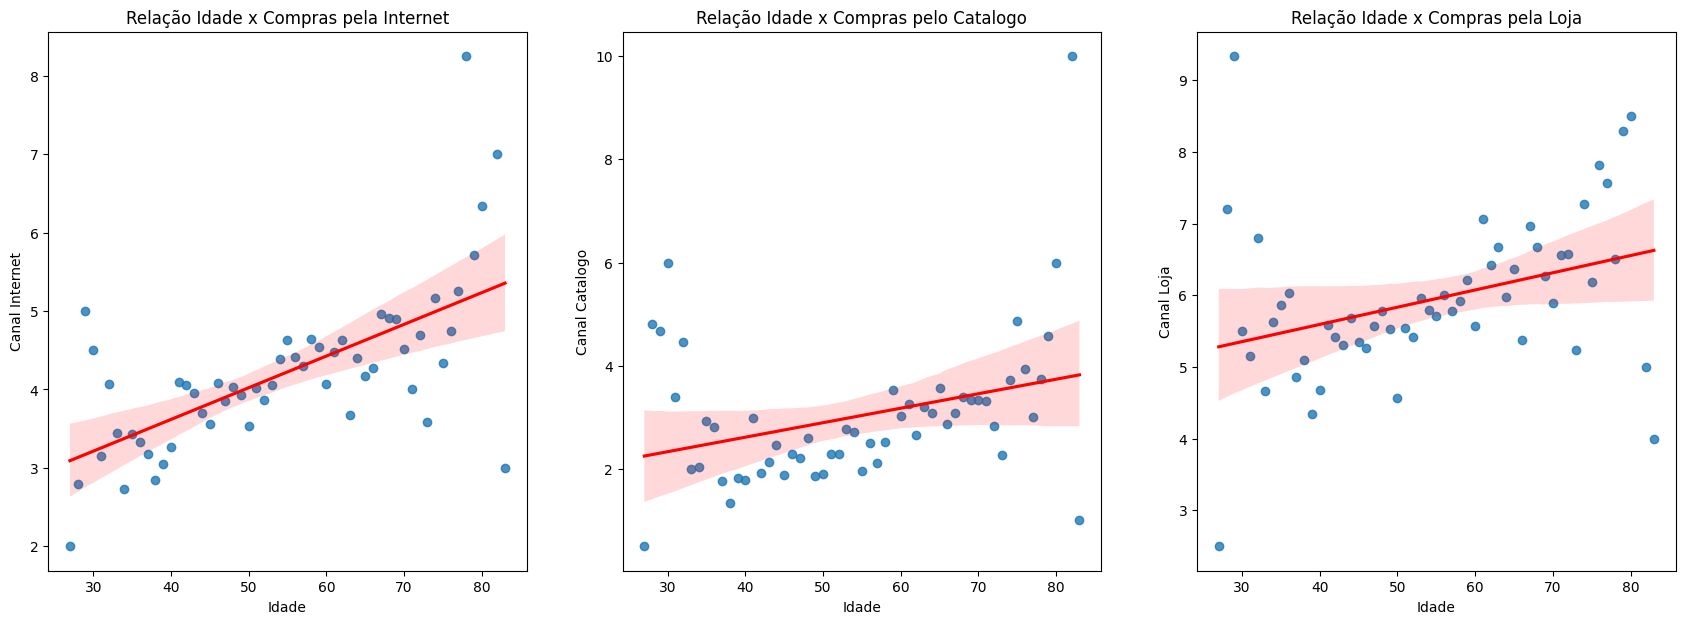

In [37]:
fig, axes = plt.subplots(1,3,figsize=(21,7))

sns.regplot(x=dfCanalIdade['Idade'], y=dfCanalIdade['Compras_Internet'],ax=axes[0], line_kws={'color':'red'})
axes[0].set_title('Relação Idade x Compras pela Internet')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Canal Internet')

sns.regplot(x=dfCanalIdade['Idade'], y=dfCanalIdade['Compras_Catalogo'],ax=axes[1], line_kws={'color':'red'})
axes[1].set_title('Relação Idade x Compras pelo Catalogo')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Canal Catalogo')

sns.regplot(x=dfCanalIdade['Idade'], y=dfCanalIdade['Compras_Loja'],ax=axes[2], line_kws={'color':'red'})
axes[2].set_title('Relação Idade x Compras pela Loja')
axes[2].set_xlabel('Idade')
axes[2].set_ylabel('Canal Loja')

Contraintuitivamente vemos que não há correlação negativa da idade com o canal digital de compras.

É possível reforçar a relação fortemente positiva, não tão forte para o canal Catálogo, do hábito de compra observando os canais.

### Campanhas

Campanhas mais aceitas

Text(0, 0.5, 'Campanhas')

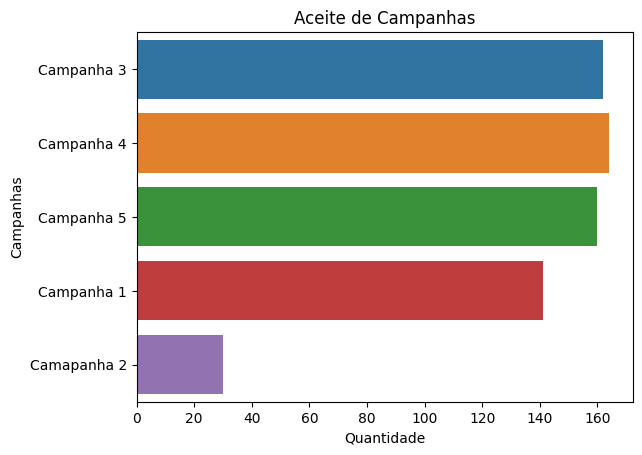

In [38]:
dfCampanhas = (
      dfClientes[['Aceita_Campanha3','Aceita_Campanha4','Aceita_Campanha5','Aceita_Campanha1','Aceita_Campanha2']]
      .rename(columns = {'Aceita_Campanha3':'Campanha 3','Aceita_Campanha4':'Campanha 4','Aceita_Campanha5':'Campanha 5'
                        ,'Aceita_Campanha1':'Campanha 1','Aceita_Campanha2':'Camapanha 2'})
      .sum()
      .reset_index()
      .rename(columns={'index':'Campanhas',0:'Quantidade'})
  )

sns.barplot(x=dfCampanhas['Quantidade'], y=dfCampanhas['Campanhas'])
plt.title('Aceite de Campanhas')
plt.xlabel('Quantidade')
plt.ylabel('Campanhas')

In [39]:
dfClientes['Aceita_Campanha1'].value_counts(normalize=True)

0    0.935851
1    0.064149
Name: Aceita_Campanha1, dtype: float64

In [40]:
dfClientes['Aceita_Campanha2'].value_counts(normalize=True)

0    0.986351
1    0.013649
Name: Aceita_Campanha2, dtype: float64

In [41]:
dfClientes['Aceita_Campanha3'].value_counts(normalize=True)

0    0.926297
1    0.073703
Name: Aceita_Campanha3, dtype: float64

In [42]:
dfClientes['Aceita_Campanha4'].value_counts(normalize=True)

0    0.925387
1    0.074613
Name: Aceita_Campanha4, dtype: float64

In [43]:
dfClientes['Aceita_Campanha5'].value_counts(normalize=True)

0    0.927207
1    0.072793
Name: Aceita_Campanha5, dtype: float64

Em relação a eficiência das campanhas em termos de impacto nos clientes vemos que o desempenho da Campanha 2 é bem abaixo das demais com um atingimento de 1% em comparação a uma média de aproximadamente 7% das outras, indicando que a comunicação dessa campanha não foi aderente

Campanhas x Total Gasto

Text(0, 0.5, 'Total de Gastos')

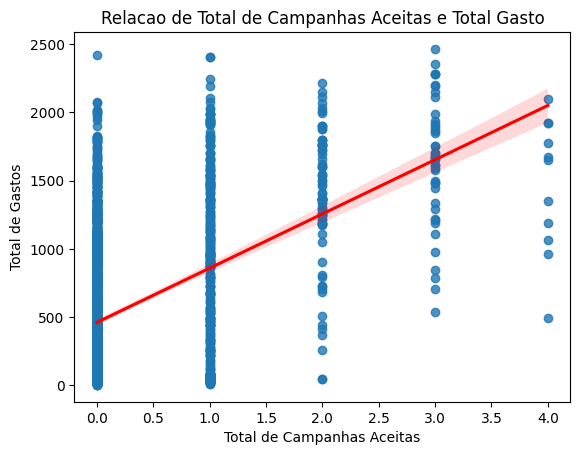

In [52]:
dfClientes['Total_Campanhas'] = \
dfClientes['Aceita_Campanha1'] + \
dfClientes['Aceita_Campanha2'] + \
dfClientes['Aceita_Campanha3'] + \
dfClientes['Aceita_Campanha4'] + \
dfClientes['Aceita_Campanha5']


sns.regplot(x=dfClientes['Total_Campanhas'],y=dfClientes['Total_Gasto'], line_kws= {'color':'red'})
plt.title('Relacao de Total de Campanhas Aceitas e Total Gasto')
plt.xlabel('Total de Campanhas Aceitas')
plt.ylabel('Total de Gastos')

Campanhas x Recencia

Text(0, 0.5, 'Campanha 5')

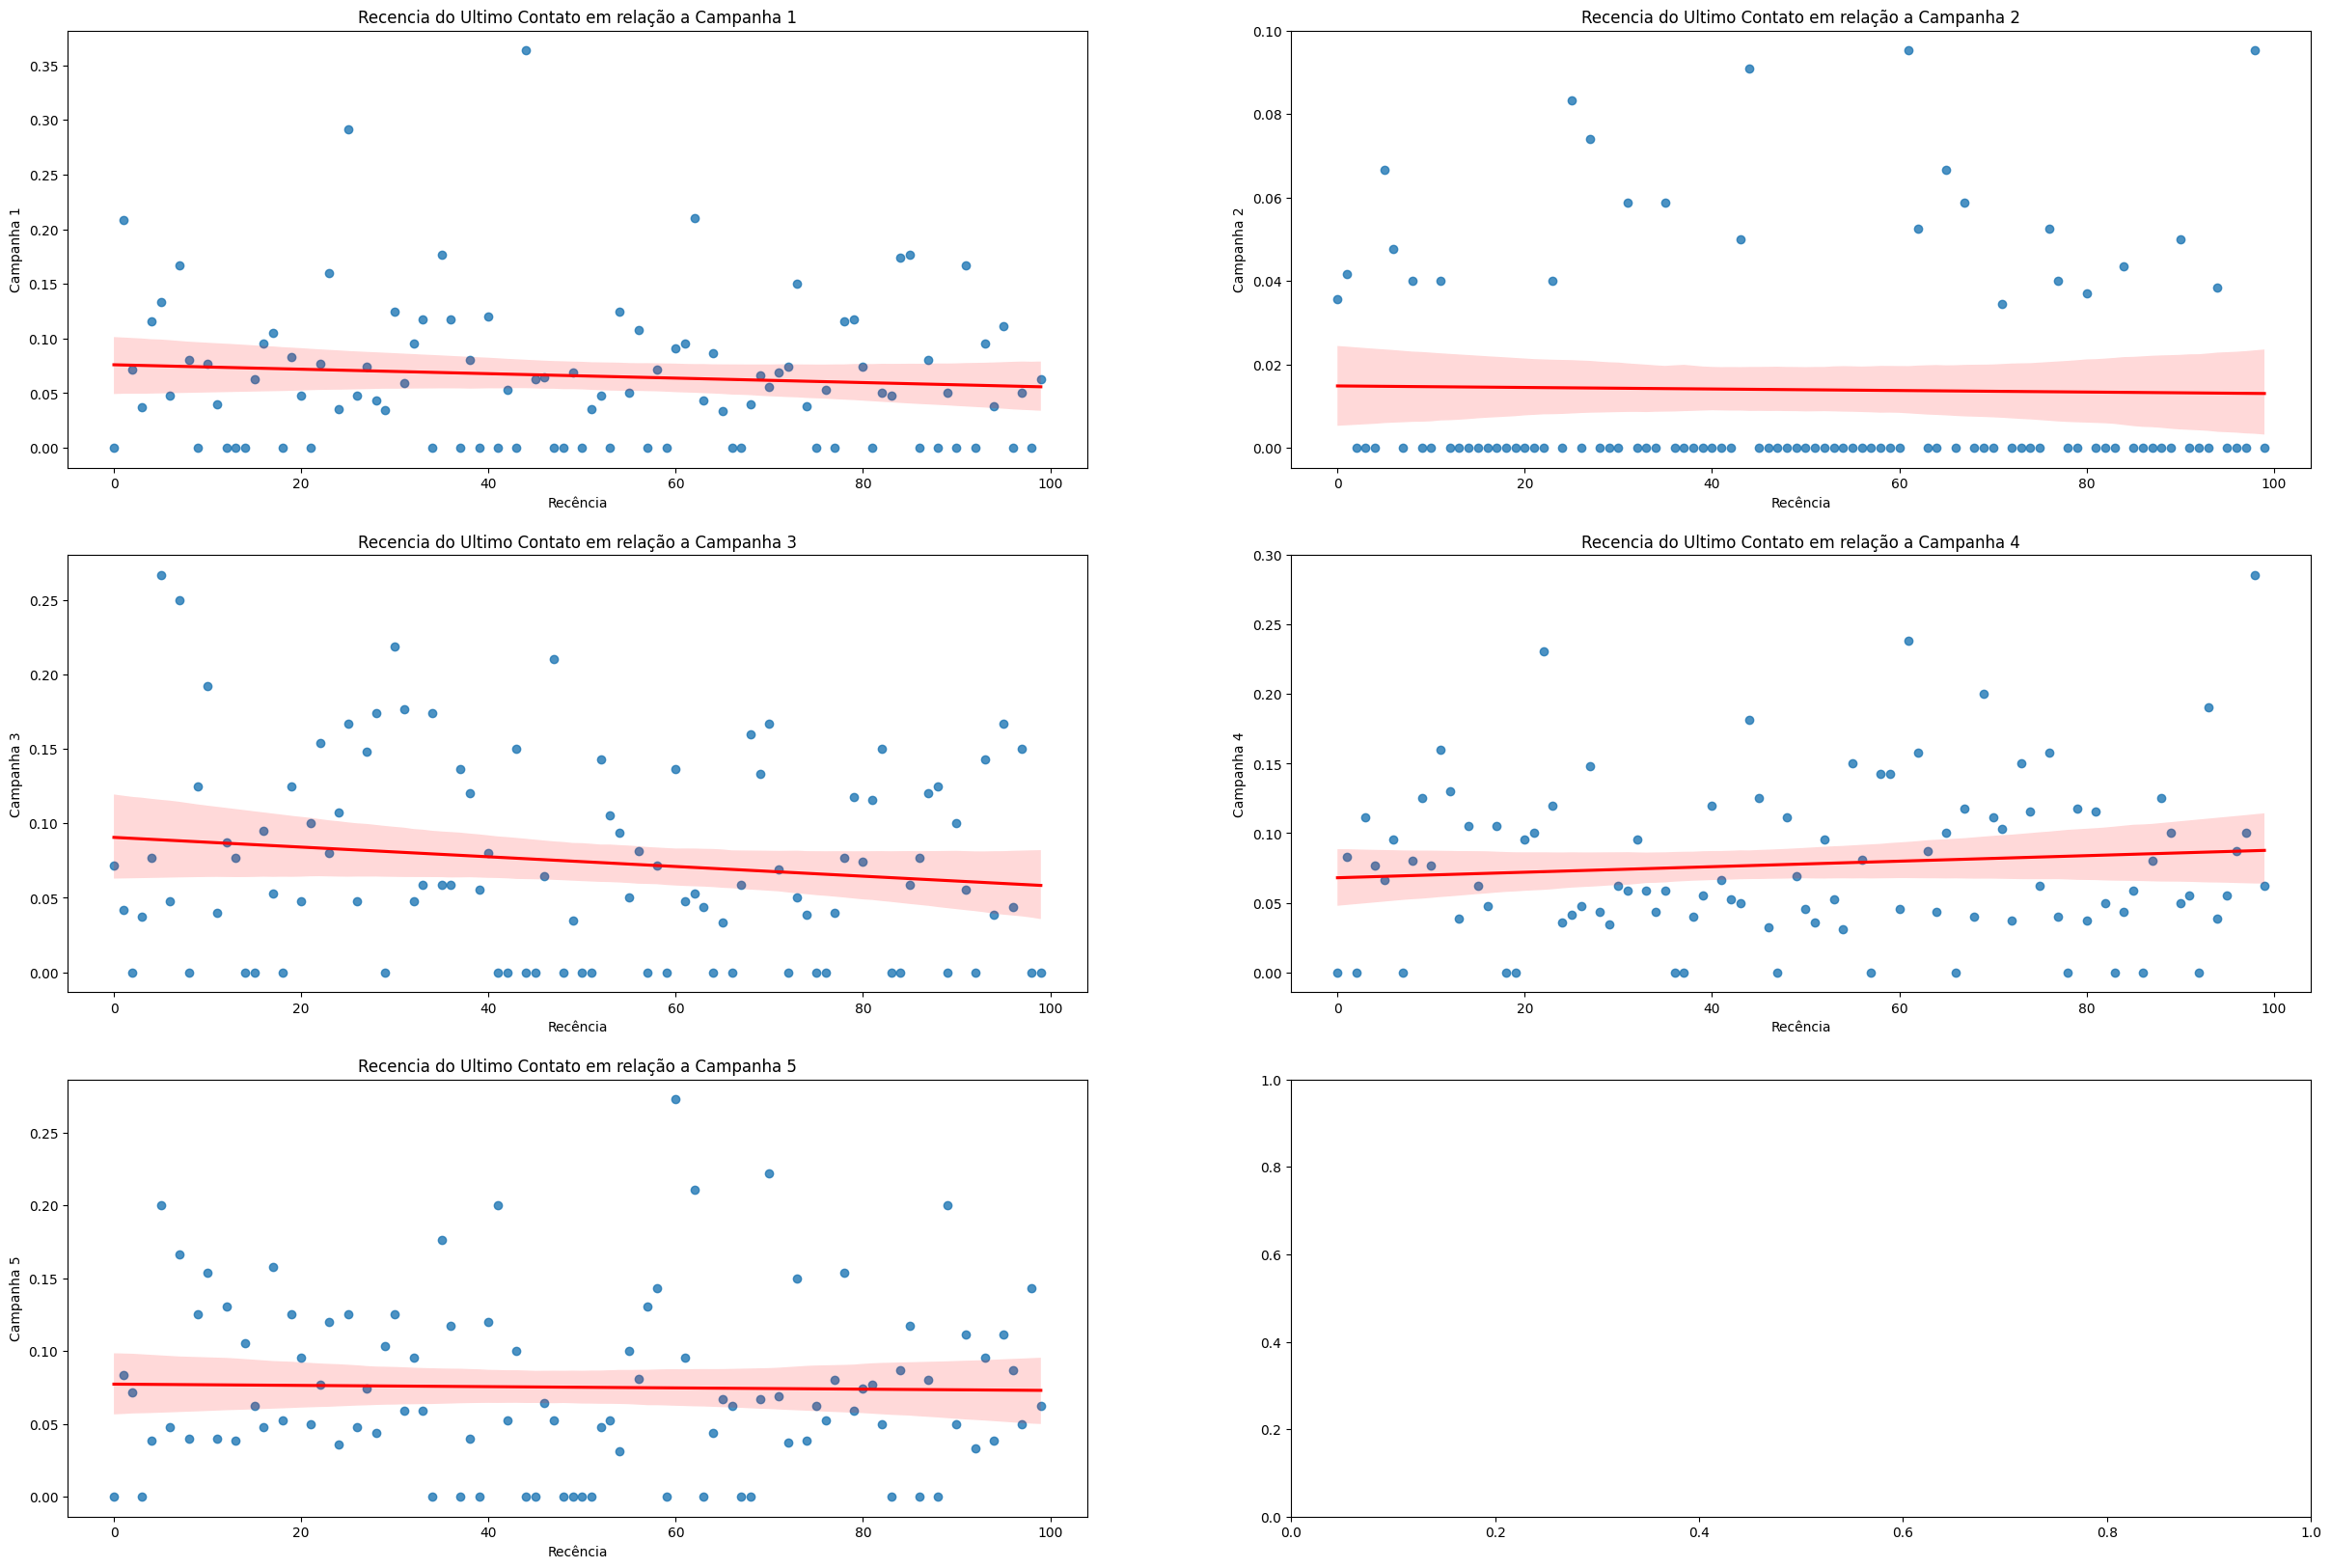

In [74]:
fig, axes = plt.subplots(3,2, figsize=(30,20))


dfT = (dfClientes[['Aceita_Campanha1','Aceita_Campanha2','Aceita_Campanha3','Aceita_Campanha4','Aceita_Campanha5','Recencia']]
         .groupby('Recencia')
         .mean()
         .reset_index()
  )

sns.regplot(x=dfT['Recencia'],y=dfT['Aceita_Campanha1'],ax=axes[0,0], line_kws={'color':'red'})
axes[0,0].set_title('Recencia do Ultimo Contato em relação a Campanha 1')
axes[0,0].set_xlabel('Recência')
axes[0,0].set_ylabel('Campanha 1')

sns.regplot(x=dfT['Recencia'],y=dfT['Aceita_Campanha2'],ax=axes[0,1], line_kws={'color':'red'})
axes[0,1].set_title('Recencia do Ultimo Contato em relação a Campanha 2')
axes[0,1].set_xlabel('Recência')
axes[0,1].set_ylabel('Campanha 2')

sns.regplot(x=dfT['Recencia'],y=dfT['Aceita_Campanha3'],ax=axes[1,0], line_kws={'color':'red'})
axes[1,0].set_title('Recencia do Ultimo Contato em relação a Campanha 3')
axes[1,0].set_xlabel('Recência')
axes[1,0].set_ylabel('Campanha 3')

sns.regplot(x=dfT['Recencia'],y=dfT['Aceita_Campanha4'],ax=axes[1,1], line_kws={'color':'red'})
axes[1,1].set_title('Recencia do Ultimo Contato em relação a Campanha 4')
axes[1,1].set_xlabel('Recência')
axes[1,1].set_ylabel('Campanha 4')

sns.regplot(x=dfT['Recencia'],y=dfT['Aceita_Campanha5'],ax=axes[2,0], line_kws={'color':'red'})
axes[2,0].set_title('Recencia do Ultimo Contato em relação a Campanha 5')
axes[2,0].set_xlabel('Recência')
axes[2,0].set_ylabel('Campanha 5')



Extratificando as campanhas para ver a relação de cada uma com a ultima interação dos clientes vimos que a média de aceite de todas as campanhas não tem uma relação forte com o tempo que o cliente teve a ultima interação.

Recencia Média - Indica a ativação da base


In [79]:
print(f"Recencia Média dos Clientes {dfClientes['Recencia'].mean().round(0)} dias")

Recencia Média dos Clientes 49.0


Em média o ultimo contato dos clientes gira em torno de 49 dias, o que pode indicar clientes com pouca recorrencia

### Clientes que possuem filhos compram mais? gastam mais?

In [88]:
print(f"Gasto Médio de clientes sem filhos: {dfClientes.loc[(dfClientes['Qtd_Criancas'] == 0) & (dfClientes['Qtd_Adolescentes'] == 0)]['Total_Gasto'].mean()}")
print(f"Gasto Médio de clientes com filhos: {dfClientes.loc[~(dfClientes['Qtd_Criancas'] == 0) & (dfClientes['Qtd_Adolescentes'] == 0)]['Total_Gasto'].mean()}")

Gasto Médio de clientes sem filhos: 1052.9776357827477
Gasto Médio de clientes com filhos: 177.08039215686276


In [89]:
print(f"Quantidade de clientes sem filhos: {dfClientes.loc[(dfClientes['Qtd_Criancas'] == 0) & (dfClientes['Qtd_Adolescentes'] == 0)]['Total_Gasto'].count()}")
print(f"Quantidade de clientes com filhos: {dfClientes.loc[~(dfClientes['Qtd_Criancas'] == 0) & (dfClientes['Qtd_Adolescentes'] == 0)]['Total_Gasto'].count()}")

Quantidade de clientes sem filhos: 626
Quantidade de clientes com filhos: 510


Em média pessoas que tem filhos gastam bem menos das que não tem, aproximadamente 5 vezes menos.

O que pode indicar uma oportunidade de expansão de produtos para aumentar o faturamento para este segmento de clientes, uma vez que representa quase metade da base.